In [373]:
import pandas as pd
import seaborn as sns
import numpy as np

In [374]:
from sklearn.tree import DecisionTreeClassifier

In [375]:
from sklearn.model_selection import train_test_split

In [376]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features, 
                          class_names=class_names, 
                          filled=True, rounded=True, 
                          special_characters=True) 

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [377]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [378]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [379]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [380]:
l = df.bill_length_mm
df.bill_length_mm = l.fillna(l.mean()) # Fills the NaN with average

In [381]:
d = df.bill_depth_mm
df.bill_depth_mm = d.fillna(d.mean()) # Fills the NaN with average

In [382]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.0,3750.0,Male
1,Adelie,Torgersen,39.50000,17.40000,186.0,3800.0,Female
2,Adelie,Torgersen,40.30000,18.00000,195.0,3250.0,Female
3,Adelie,Torgersen,43.92193,17.15117,NaN,NaN,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.0,3450.0,Female


In [383]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42, stratify=df['species'])
print(df_train.shape, df_test.shape)

(240, 7) (104, 7)


In [384]:
# df_train has 240 rows and 7 columns
# df_test has 104 rows and 7 columns

In [385]:
features= ['bill_length_mm', 'bill_depth_mm']
dt_classification = DecisionTreeClassifier(max_depth = 5) # Increase max_depth to see effect in the plot
dt_classification.fit(df_train[features], df_train['species'])

DecisionTreeClassifier(max_depth=5)

In [386]:
predictionsOnTrainset = dt_classification.predict(df_train[features])
predictionsOnTestset = dt_classification.predict(df_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, df_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, df_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.9958333333333333
Accuracy on test set 0.9230769230769231


In [387]:
# The accuracy of the training set and the test set has a difference of about 0.08. 
# Yes, I expected this difference because of the max_depth of 5 and the fact that it is 
# more specific because 2 features are used.

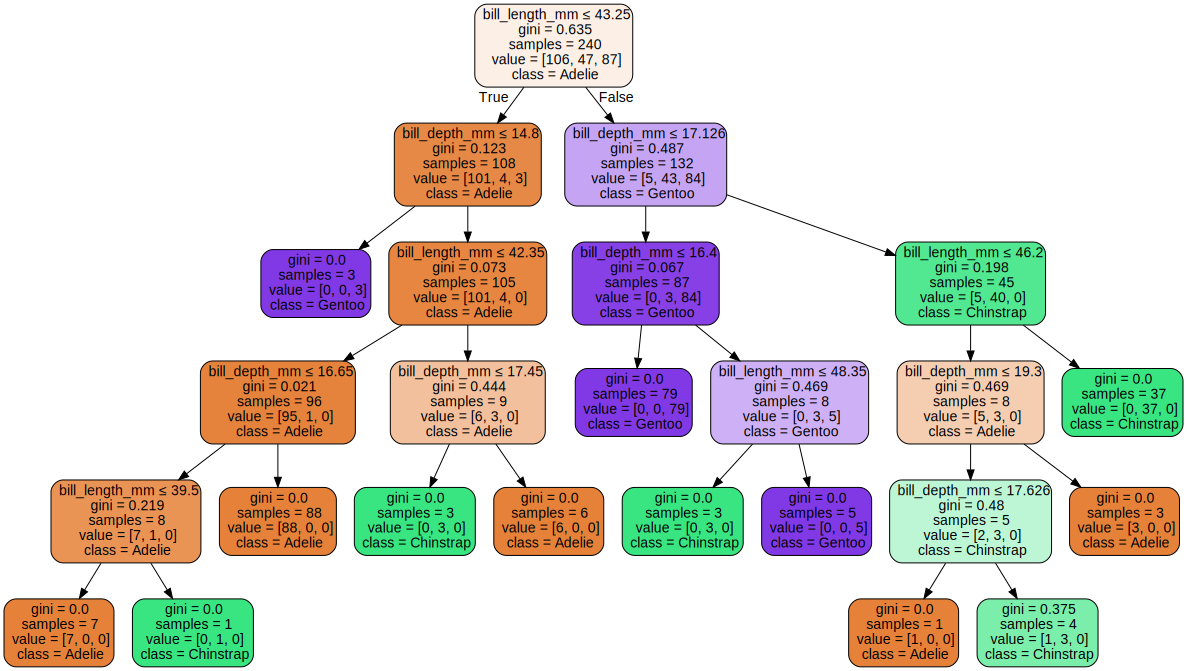

In [388]:
plot_tree_classification(dt_classification, features, np.sort(df.species.unique()))

In [389]:
# Yes, it compares the average of the bill_length_mm and puts it to the left if its true, 
# and right if false. After that it compares the bill_depth_mm then the same riddle goes on.

In [390]:
cleanDf = df.dropna(subset=['sex'])

In [391]:
cleanDf.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [392]:
cleanDf.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [393]:
df_train, df_test = train_test_split(cleanDf, test_size=0.3, random_state=42, stratify=cleanDf['sex'])
print(df_train.shape, df_test.shape)

(233, 7) (100, 7)


In [394]:
# df_train has 233 rows and 7 columns
# df_test has 100 rows and 7 columns

In [395]:
features= ['bill_length_mm', 'bill_depth_mm']
dt_classification = DecisionTreeClassifier(max_depth = 5) # Increase max_depth to see effect in the plot
dt_classification.fit(df_train[features], df_train['sex'])

DecisionTreeClassifier(max_depth=5)

In [396]:
predictionsOnTrainset = dt_classification.predict(df_train[features])
predictionsOnTestset = dt_classification.predict(df_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, df_train.sex)
accuracyTest = calculate_accuracy(predictionsOnTestset, df_test.sex)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.927038626609442
Accuracy on test set 0.79


In [397]:
# The accuracy of the training set and the test set has a difference of about 0.14. 
# Yes, I expected this difference because of the max_depth of 5 and the fact that it is 
# more specific because 2 features are used. The gap is bigger than before because 
# for example in real life there would be more correlation between species and height/ 
# length than sex and height/length.

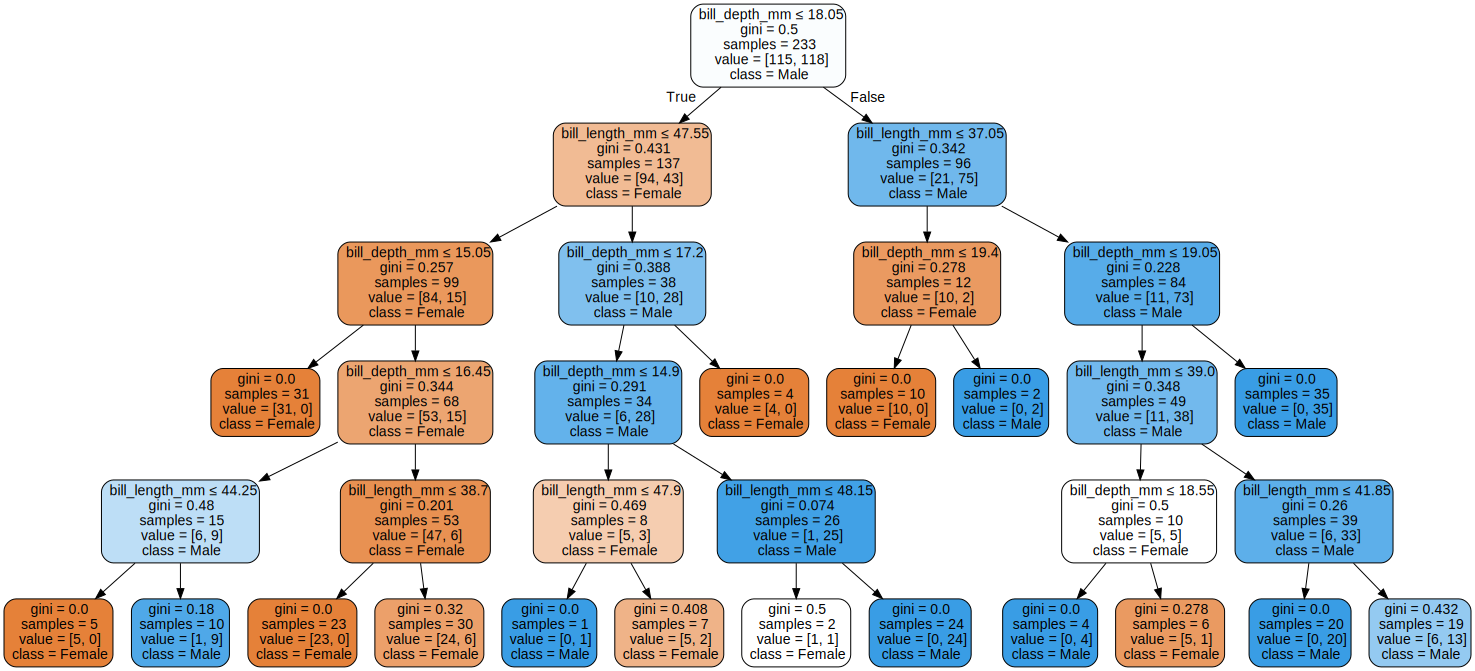

In [398]:
plot_tree_classification(dt_classification, features, np.sort(cleanDf.sex.unique()))

In [399]:
# Yes, it compares the average of the bill_length_mm and puts it to the left if its true, 
# and right if false. After that it compares the bill_depth_mm then the same riddle goes on.